# Simulating noise in synthetic arterial pressure data

In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import os, sys
sys.path.append(os.pardir)  # Needed for sidewinder import before we install it

import numpy as np
import matplotlib.pyplot as plt

from sidewinder.synthetic import synthetic_arterial_pressure_data
from sidewinder.waveforms import Waveforms
from sidewinder.features.waveform import find_troughs

## Load some waveform data

We generate some synthetic arterial blood pressure data for demonstration purposes.

In [22]:
data_with_flush = synthetic_arterial_pressure_data(
    systolic_pressure=120,
    diastolic_pressure=80,
    heart_rate=60,
    n_beats_target=5.3,
    hertz=100
)

data_with_flush.loc[
    330:460,
    "pressure"
] += 300.0

In [23]:
wf_with_flush = Waveforms(data_with_flush)
wf_with_flush = find_troughs(wf_with_flush, "pressure")

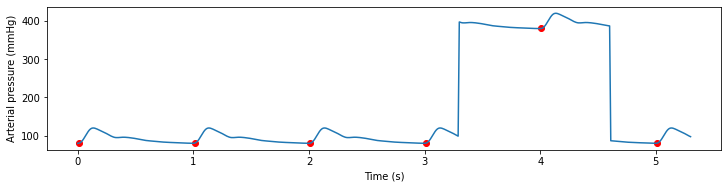

In [24]:
fig, ax = plt.subplots(figsize=(10, 2.5), constrained_layout=True)
ax.plot(data_with_flush.time, data_with_flush.pressure)
ax.scatter(
    data_with_flush.time[wf_with_flush.features.waveform['pressure']['troughs']],
    data_with_flush.pressure[wf_with_flush.features.waveform['pressure']['troughs']],
    color='red',
)
ax.set(xlabel='Time (s)', ylabel='Arterial pressure (mmHg)')
plt.show()